# Load raster from PostGIS

In [1]:
from figutils import query

In [1]:
from matplotlib import pyplot
%matplotlib inline

In [2]:
from database.models import Site

In [3]:
Hofgarten = Site.objects.get(name = 'Hofgarten')

In [4]:
Hofgarten.geometry.ewkt

'SRID=31254;POINT (80535.11160000041 237665.08)'

In [6]:
query_sql = u"""SELECT ST_AsGDALRaster(ST_AsRaster((ST_Intersection(raster, ST_Buffer(ST_GeomFromEWKT('{0}'), 100))).geom, raster), 'PNG') 
                FROM public.rast_landcover_merged_publication 
                WHERE ST_Intersects(raster, ST_AsRaster(ST_Buffer(ST_GeomFromEWKT('{0}'), 100), raster));""".format(Hofgarten.geometry.ewkt)

In [7]:
query_sql = u"""SELECT ST_AsGDALRaster(ST_AsRaster(ST_Buffer(ST_GeomFromEWKT('{0}'), 10), 200, 200), 'PNG')""".format(Hofgarten.geometry.ewkt)

In [8]:
query_sql

"SELECT ST_AsGDALRaster(ST_AsRaster(ST_Buffer(ST_GeomFromEWKT('SRID=31254;POINT (80535.11160000041 237665.08)'), 10), 200, 200), 'PNG')"

In [9]:
raster = query.get_raster(query_sql)

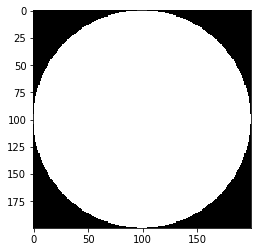

In [10]:
pyplot.imshow(raster, cmap='gray')